In [11]:
import numpy as ny
from numpy import *
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler # required to Z transform the data

iris = datasets.load_iris()

In [12]:
data = iris["data"][:,:2] # slicing the dataset to get only the first two cols
norm_data = MinMaxScaler().fit_transform(data)   # normalising the data

In [13]:
N, M = norm_data.shape
print(N,M)

150 2


In [23]:
class KMeans(object):
    def __init__(self,K,gens,N,M):
        self.K = K
        self.gens = gens
        self.rows = N
        self.cols = M
        self.assgns = ny.zeros((1, N))
        self.centers = ny.random.random((K, M))
        
    def classify(self):
        for gen in ny.arange(self.gens):
            for p in ny.arange(self.rows):
                dists = ny.zeros((1, self.K))
                for c in ny.arange(K):
                    dists[0,c] = ny.sqrt(ny.sum((norm_data[p,:] - self.centers[c,:])**2))
                locs = ny.argsort(dists)
                self.assgns[0, p] = locs[0,0]
            #update centers
            for c in ny.arange(self.K):
                bins=ny.where(self.assgns == c)
                #print("Locs in update",bins[1])
                if len(bins[1])==0:
                    self.centers[c,:] = ny.mean(centers)
                else:
                    self.centers[c, :] = ny.mean(norm_data[bins[1],:])
                
    def plot_result(self):
        for c in ny.arange(self.K):
            bins=ny.where(self.assgns == c)
            if c == 0:
                plt.scatter(norm_data[bins[1],0] ,norm_data[bins[1],1],marker='^',color = "red")
            elif c==1:
                plt.scatter(norm_data[bins[1],0],norm_data[bins[1],1],marker='*',color = "green")
            else:
                plt.scatter(norm_data[bins[1],0],norm_data[bins[1],1],marker='h',color = "black")

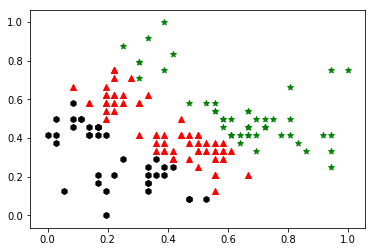

In [28]:
kmeans = KMeans(K= 3,gens = 50,N=N,M=M)
kmeans.classify()
kmeans.plot_result()